In [1]:
import pathlib
import json
import re
import pandas


result = []
def extract_benchmark_times():
    run_pattern = re.compile('^run(\d+)_')
    for instance in pathlib.Path('same_commit').iterdir():
        for benchmark_file in instance.iterdir():
            if benchmark_file.name == 'machine.json':
                continue
            with open(benchmark_file) as f:
                benchmarks_data = json.load(f)
                for benchmark_name, (benchmark_times, *_) in benchmarks_data['results'].items():
                    if benchmark_times:
                        for i, benchmark_time in enumerate(benchmark_times):
                            row = {'instance': instance.name,
                                   'run': int(run_pattern.search(benchmark_file.name).group(1)),
                                   'name': f'{benchmark_name}_{i}',
                                   'time': benchmark_time}
                            yield row


df = pandas.DataFrame(list(extract_benchmark_times()))
df.head()

instance  run                                     name      time
0   poland   18  algorithms.Duplicated.time_duplicated_0  0.000005
1   poland   18  algorithms.Duplicated.time_duplicated_1  0.000005
2   poland   18  algorithms.Duplicated.time_duplicated_2  0.000005
3   poland   18  algorithms.Duplicated.time_duplicated_3  0.000005
4   poland   18  algorithms.Duplicated.time_duplicated_4  0.000005

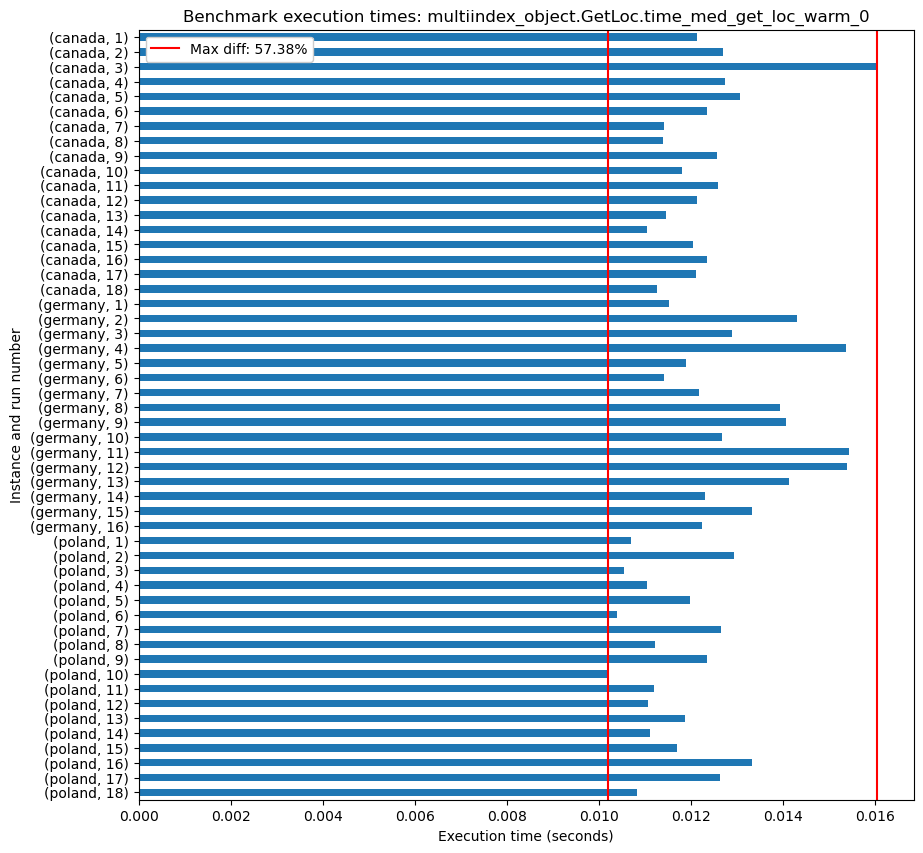

In [2]:
def plot_benchmark_execution_times(benchmark_name):
    df_one_benchmark = df[df.name == benchmark_name]
    ax = df_one_benchmark.set_index(['instance', 'run']).sort_index(ascending=False)['time'].plot.barh(title=f'Benchmark execution times: {benchmark_name}',
                                                                                                       figsize=(10, 10),
                                                                                                       xlabel='Execution time (seconds)',
                                                                                                       ylabel='Instance and run number')
    min_time = df_one_benchmark['time'].min()
    max_time = df_one_benchmark['time'].max()
    ax.axvline(min_time, color='r')
    ax.axvline(max_time, color='r')
    ax.legend(['Max diff: {:.2%}'.format(max_time / min_time - 1)],
              loc='upper left', framealpha=1.)
    return ax

plot_benchmark_execution_times('multiindex_object.GetLoc.time_med_get_loc_warm_0');